<a href="https://colab.research.google.com/github/davidharket/NN_classification_PyTorch/blob/main/neural_network_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as npm

#Neural Network classificaion with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

In [ ]:
import sklearn
from sklearn.datasets import make_circles

## Make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"first five samples of X: {X[:5]}")
print(f"first fivev samples of y: {y[:5]}")

first five samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first fivev samples of y: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 0],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.754246,1
1,-0.756159,-0.756159,1
2,-0.815392,-0.815392,1
3,-0.393731,-0.393731,1
4,0.442208,0.442208,0
5,-0.479646,-0.479646,1
6,-0.013648,-0.013648,1
7,0.771513,0.771513,1
8,-0.169322,-0.169322,1
9,-0.121486,-0.121486,0


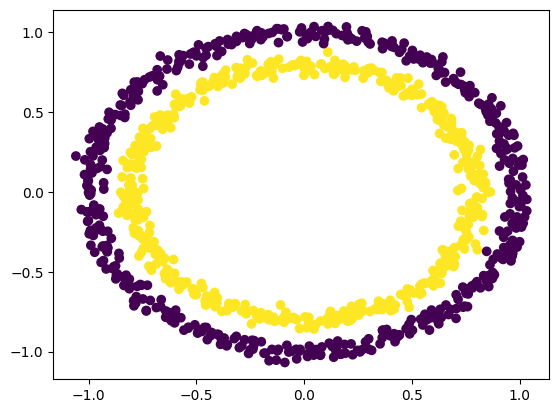

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:, 1],
            c=y)

None: data we're working with is often referred to as toy data as it is a small data

In [ ]:
X_sample = X[0]
y_sample = y[0]
print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y: {y_sample.shape}")


Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X:(2,) and the same for y: ()


In [ ]:
#Turn data to tensors

train_size = int(.8*len(X))
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42
                                                     ))

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Build a model to classify our blue and red dots

To do so, we want to:
1. Setup device agnostic code so our code will run on an exeleratior if there is one
2. Construct a model (subclassing `nn.module`)
3. Define a loss function and Optimizer
4. Create a training an testl loop

In [ ]:
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
try:
  X_train = torch.from_numpy(X_train).to(torch.float32).to(device)
  X_test = torch.from_numpy(X_test).to(torch.float32).to(device)
  y_train = torch.from_numpy(y_train).to(torch.float32).to(device)
  y_test = torch.from_numpy(y_test).to(torch.float32).to(device)
except:
  pass

In [ ]:
print(len(y_test))
X_train.unsqueeze(dim=1)
X_test.unsqueeze(dim=1)

200


tensor([[[-3.7519e-01,  6.8266e-01]],

        [[ 1.5380e-02,  9.6003e-01]],

        [[-7.0278e-01, -3.1472e-01]],

        [[-2.8525e-01,  9.6638e-01]],

        [[ 4.0242e-01, -7.4375e-01]],

        [[ 6.3228e-01, -5.7111e-01]],

        [[ 8.5607e-01,  5.4994e-01]],

        [[ 1.0034e+00,  1.9028e-01]],

        [[-7.4892e-01, -2.9511e-01]],

        [[ 5.3780e-02,  9.7388e-01]],

        [[-4.7020e-01,  7.8749e-01]],

        [[-2.1686e-01,  7.2418e-01]],

        [[ 9.7026e-01,  3.6688e-01]],

        [[-5.8446e-01, -5.7415e-01]],

        [[-9.1147e-01, -2.4631e-01]],

        [[ 7.6892e-01, -7.3249e-02]],

        [[ 3.8408e-01,  6.8299e-01]],

        [[-6.8364e-01,  7.1417e-01]],

        [[-5.7777e-01,  5.3652e-01]],

        [[-8.3274e-01,  4.6625e-01]],

        [[ 1.2448e-02,  9.8709e-01]],

        [[ 1.0091e+00, -2.1970e-01]],

        [[-6.6792e-01,  4.2861e-01]],

        [[-8.4405e-01,  6.1718e-01]],

        [[ 6.3680e-01,  7.4591e-01]],

        [[ 8.9413e-01,  3

Create a model that:
1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. instatiate an insatnce of our model class and send it to the target device

In [ ]:
# 1. Contruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    #2. Create 2 nn.Linear layer capable of handeling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=10) #takes in two features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=10, out_features=1) #takes in five features form previous layer and outputs a single feature (same shape as y)

  # 3. define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output

#4. instanciate an instance of model class and send it to target device.

model_0 =  CircleModelV0()
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()
X_test, y_test, X_train, y_train = X_test.to(device), y_test.to(device), X_train.to(device), y_train.to(device)

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [ ]:
loss_fn = nn.BCEWithLogitsLoss() #Binary Cross Entropy with Logit Loss = Sigmoid activation function built in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2892, -0.1119],
                      [-0.6368,  0.5459],
                      [ 0.1304,  0.4570],
                      [-0.5787,  0.6549],
                      [-0.2873,  0.6830],
                      [-0.2494, -0.5154],
                      [ 0.5378,  0.6861],
                      [ 0.2322,  0.5320],
                      [-0.4462,  0.4247],
                      [-0.1019, -0.5493]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5419,  0.1020, -0.4431, -0.2988,  0.2773, -0.6138, -0.0846, -0.4105,
                      -0.5429, -0.2786], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0657,  0.2512, -0.0104,  0.2905,  0.0995,  0.0426,  0.0767,  0.0026,
                       -0.1370, -0.0501]], device='cuda:0')),
             ('1.bias', tensor([-0.0410], device='cuda:0'))])

In [1]:
#Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

##Going from raw logits -> prediction probabilities -> prediction labels

out models outputs are going to be raw logits.

We can convert these logits into prediction probabilities by passing them into some kind of activation function (e.g., sigmoid for binary classification and softmax for multiclass classification)

then we can convert our models's prediction probabilities to prediction labels by either rounind them or taking the `argmax()`

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0 (X_test.to(device))[:5]
y_logits

tensor([[ 0.3264],
        [ 0.3280],
        [ 0.0198],
        [ 0.4146],
        [-0.4605]], device='cuda:0')

In [ ]:
len(y_test)

200

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5809],
        [0.5813],
        [0.5049],
        [0.6022],
        [0.3869]], device='cuda:0')

In [ ]:
torch.round(y_pred_prob)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

For our prediction probability values, ew need to perform a range-style rounding om them

`y_pred_prob`>= 0.5, `y=1` (class 1)

`y_pred_prob`<= 0.5 `y=0` (class 0)

In [ ]:
#train model

torch.cuda.manual_seed=42
epochs = 1000



for epoch in range(epochs):

  #set model to training
  model_0.train()

  #initialte forward model
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)).squeeze() # turn logits -> pred probs -> pred labels

  # calculate loss function
  loss = loss_fn(y_logits, y_train.squeeze()) #BCE**WITH LOGITS LOSS** Use logit data //
                                    #BCELoss expects prediction probabilities as input loss_fn(torch.sigmoid(y_logits), y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #optizer zero grad
  optimizer.zero_grad()

  #compute backward propagation
  loss.backward()

  #complete optimizer step
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate test loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test.squeeze())
    test_acc = accuracy_fn(y_true=y_train,
                           y_pred=y_pred)

  if epoch % 100 == 0:
    print(f"epoch:{epoch}")
    print(f"Loss: {loss}")
    print(f"accuracy: {accuracy_fn(y_train, y_pred)}")
    print(f"test_loss: {test_loss}")
    print(f"test_accuracy: {test_acc}")

epoch:0
Loss: 0.704395592212677
accuracy: 49.25
test_loss: 0.7098641991615295
test_accuracy: 49.25
epoch:10
Loss: 0.7043182253837585
accuracy: 49.25
test_loss: 0.7097747921943665
test_accuracy: 49.25
epoch:20
Loss: 0.7042413949966431
accuracy: 49.25
test_loss: 0.7096859812736511
test_accuracy: 49.25
epoch:30
Loss: 0.7041651606559753
accuracy: 49.25
test_loss: 0.7095977663993835
test_accuracy: 49.25
epoch:40
Loss: 0.7040898203849792
accuracy: 49.25
test_loss: 0.7095102667808533
test_accuracy: 49.25
epoch:50
Loss: 0.7040148973464966
accuracy: 49.25
test_loss: 0.709423303604126
test_accuracy: 49.25
epoch:60
Loss: 0.7039405703544617
accuracy: 49.25
test_loss: 0.7093369960784912
test_accuracy: 49.25
epoch:70
Loss: 0.7038669586181641
accuracy: 49.25
test_loss: 0.7092512249946594
test_accuracy: 49.25
epoch:80
Loss: 0.7037939429283142
accuracy: 49.25
test_loss: 0.7091661691665649
test_accuracy: 49.25
epoch:90
Loss: 0.7037214636802673
accuracy: 49.25
test_loss: 0.7090815305709839
test_accuracy:

In [ ]:
# 1. Contruct model that subclasses nn.Module
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layer capable of handeling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=10) #takes in two features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=10, out_features=10) #takes in five features form previous layer and outputs a single feature (same shape as y)
    self.layer_3 = nn.Linear(in_features=10, out_features=1) #Takes in 10, gives out 1

  # 3. define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # x-> layer_1 -> layer_2 -> output

# 4. instanciate an instance of model class and send it to target device.

model_1 =  CircleModelV0()
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)

In [ ]:
# Test loop
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)


epochs = 1000

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train)
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_train, y_logits.squeeze())
  acc == accuracy_fn(y_train, y_pred.squeeze())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():

    test_logits = model_1(X_test)
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(y_test, test_logits.squeeze())
    test_acc = accuracy_fn(y_test, test_pred.squeeze())


  if epoch % 100 == 0:
    print(f"loss: {loss}| accuracy: {acc}| test_loss: {test_loss}| test_accuracy: {test_acc}| epoch:{epoch}|")


loss: 0.91886967420578| accuracy: 50.0| test_loss: 0.9119747877120972| test_accuracy: 52.5| epoch:0|
loss: 0.8510243892669678| accuracy: 50.0| test_loss: 0.8442121744155884| test_accuracy: 57.49999999999999| epoch:100|
loss: 0.7831190228462219| accuracy: 50.0| test_loss: 0.7763699889183044| test_accuracy: 50.0| epoch:200|
loss: 0.7147245407104492| accuracy: 50.0| test_loss: 0.7080190777778625| test_accuracy: 50.0| epoch:300|
loss: 0.645406186580658| accuracy: 50.0| test_loss: 0.6387251615524292| test_accuracy: 50.0| epoch:400|
loss: 0.5747207999229431| accuracy: 50.0| test_loss: 0.5680450201034546| test_accuracy: 50.0| epoch:500|
loss: 0.5022097826004028| accuracy: 50.0| test_loss: 0.4955197870731354| test_accuracy: 50.0| epoch:600|
loss: 0.4273987412452698| accuracy: 50.0| test_loss: 0.4206753075122833| test_accuracy: 50.0| epoch:700|
loss: 0.34978950023651123| accuracy: 50.0| test_loss: 0.3430130183696747| test_accuracy: 50.0| epoch:800|
loss: 0.26885566115379333| accuracy: 50.0| tes

In [ ]:
weight = 0.7
bias = 0.3

X_regression = torch.arange(start=0, end=1, step=.01).unsqueeze(dim=1)

y_regression = weight * X_regression + bias

len(X_regression), len(y_regression)


(100, 100)

In [2]:
train_split = int(.8* len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

NameError: ignored

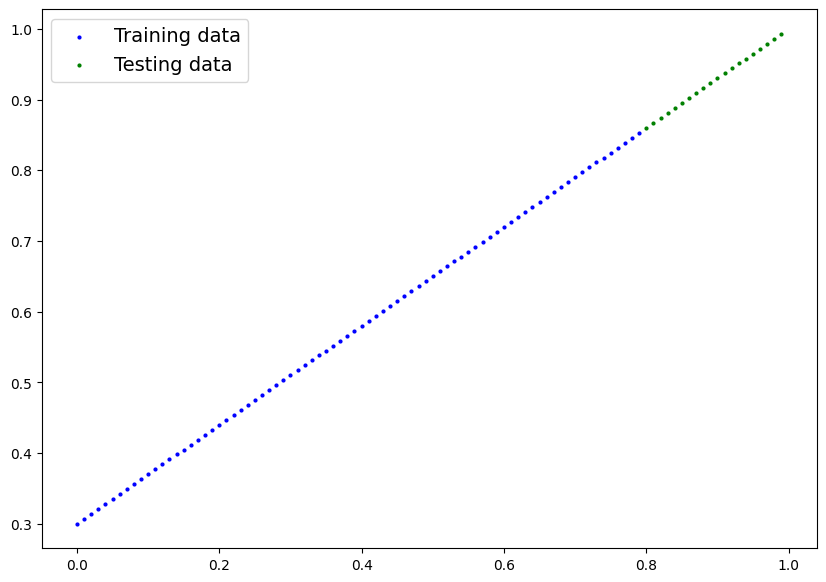

In [ ]:
# Functionalize plot predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in gree
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the preditcions if tey exist
    plt.scatter(test_data, predictions)

  # Show the legend
  plt.legend(prop= {"size": 14,});


plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [ ]:
class RegressionModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=1, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=5)
        self.layer_3 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
model_2 = RegressionModelV0()

# or

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=.001)
print(X_train_regression)

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900],
        [0.1000],
        [0.1100],
        [0.1200],
        [0.1300],
        [0.1400],
        [0.1500],
        [0.1600],
        [0.1700],
        [0.1800],
        [0.1900],
        [0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900],
        [0.3000],
        [0.3100],
        [0.3200],
        [0.3300],
        [0.3400],
        [0.3500],
        [0.3600],
        [0.3700],
        [0.3800],
        [0.3900],
        [0.4000],
        [0.4100],
        [0.4200],
        [0.4300],
        [0.4400],
        [0.4500],
        [0.4600],
        [0.4700],
        [0.4800],
        [0.4900],
        [0.5000],
        [0.5100],
        [0.5200],
        [0.5300],
        [0.5400],
        [0

In [ ]:
#train model
torch.manual_seed(42)

epochs = 1000
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)
model_2 = model_2.to(device)


for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_train_regression, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(y_test_regression, test_pred)
  if epoch % 100 == 0:
    print(f"epoch: {epoch} |loss:{loss:.5}|test_loss: {test_loss:.5} ||")


epoch: 0 |loss:0.32342|test_loss: 0.66269 ||
epoch: 100 |loss:0.11587|test_loss: 0.32646 ||
epoch: 200 |loss:0.090962|test_loss: 0.21866 ||
epoch: 300 |loss:0.079723|test_loss: 0.1837 ||
epoch: 400 |loss:0.068584|test_loss: 0.15792 ||
epoch: 500 |loss:0.057222|test_loss: 0.13116 ||
epoch: 600 |loss:0.045572|test_loss: 0.10306 ||
epoch: 700 |loss:0.033577|test_loss: 0.075247 ||
epoch: 800 |loss:0.021173|test_loss: 0.047353 ||
epoch: 900 |loss:0.0082863|test_loss: 0.018419 ||


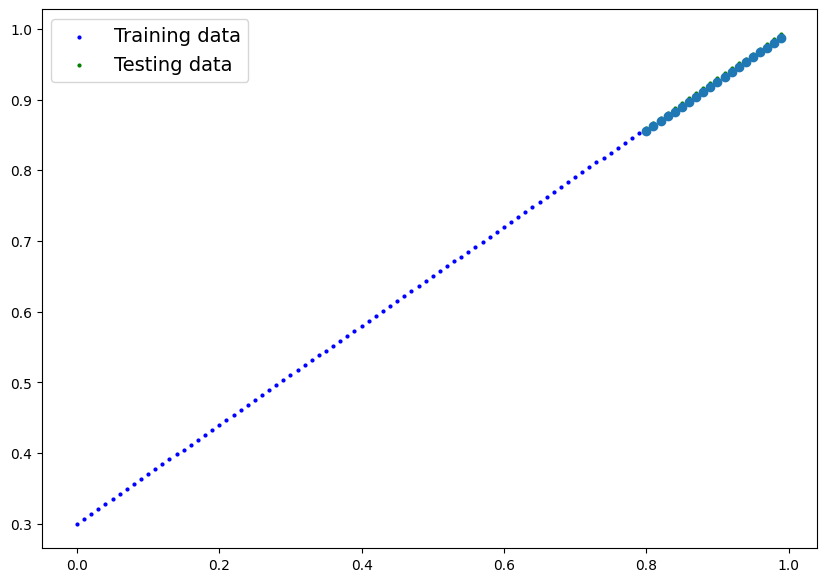

In [ ]:
X_train_regression, y_train_regression = X_train_regression.cpu(), y_train_regression.cpu()
X_test_regression, y_test_regression = X_test_regression.cpu(), y_test_regression.cpu()
model_2 = model_2.cpu()
model_2.eval()
with torch.inference_mode():
  plot_predictions(train_data=X_train_regression,
                   train_labels=y_train_regression,
                   test_data=X_test_regression,
                   test_labels=y_test_regression,
                   predictions=model_2(X_test_regression))

## 6. non-linearity

"What patterns could you draw if you were given an infinite amout of straingh and non-straight lines?"

Or in machine learning ternms, an infinite amount of linear and non-linear functions

### Recreating non-linear data

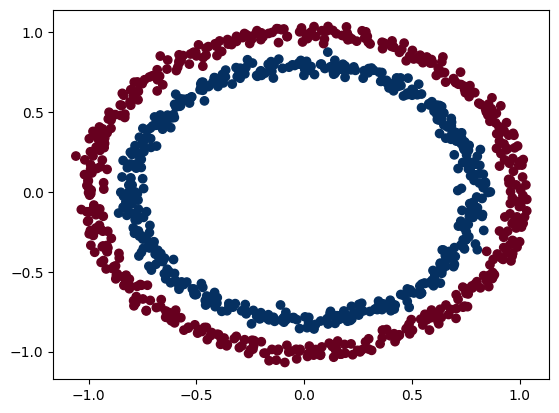

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [ ]:
# convert data to tensors and then to train and test

import torch
from sklearn.model_selection import train_test_split

#turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split into train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)


In [ ]:
# Build model with non-linearity (non-linear activation functions)
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=.1)

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)
model_3 = model_3.to(device)

for epoch in range(epochs):

  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss takes in logits as first input
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits  = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(y_test, test_logits)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"loss: {loss} | accuracy: {acc} | test loss: {test_loss} | test accuracy: {test_acc} | epoch: {epoch}|")

loss: 0.4815295338630676 | accuracy: 93.5 | test loss: 0.786780595779419 | test accuracy: 90.5 | epoch: 0|
loss: 0.37056171894073486 | accuracy: 97.75 | test loss: 0.6322476863861084 | test accuracy: 92.0 | epoch: 100|
loss: 0.2545759081840515 | accuracy: 99.0 | test loss: 0.4281695485115051 | test accuracy: 96.5 | epoch: 200|
loss: 0.17179812490940094 | accuracy: 99.5 | test loss: 0.20511063933372498 | test accuracy: 97.5 | epoch: 300|
loss: 0.12187686562538147 | accuracy: 99.625 | test loss: -0.01952216401696205 | test accuracy: 99.0 | epoch: 400|
loss: 0.09122876077890396 | accuracy: 99.875 | test loss: -0.21612116694450378 | test accuracy: 99.5 | epoch: 500|
loss: 0.07100439816713333 | accuracy: 99.875 | test loss: -0.38972610235214233 | test accuracy: 99.5 | epoch: 600|
loss: 0.05773354321718216 | accuracy: 99.875 | test loss: -0.543479323387146 | test accuracy: 99.5 | epoch: 700|
loss: 0.04852627217769623 | accuracy: 99.875 | test loss: -0.6777483224868774 | test accuracy: 99.5 |

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5302,  0.5822],
                      [-0.1686,  0.6543],
                      [-0.1549,  0.1427],
                      [-0.3612,  0.4465],
                      [ 0.6361, -0.5373],
                      [ 0.6066,  0.1332],
                      [ 0.5363,  0.0930],
                      [ 0.3410, -0.0998],
                      [ 0.5488,  0.1146],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3377, -0.0744, -0.2872,  0.4463, -0.5417, -0.3285, -0.1967, -0.4252,
                       0.0677, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2733, -0.2791,  0.2441,  0.0508, -0.1129,  0.1872,  0.0414,  0.2555,
                        0.0256, -0.0997],
                      [ 0.1157, -0.0595,  0.1331,  0.2869,  0.2084, -0.1178,  0.2022,  0.0566,
                        0.1829, -0.1927],
                      [-0.3130, -0.122

In [ ]:
### Use this to import github repos
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

# Import the functions you need
from helper_functions import plot_decision_boundary, plot_predictions

# Now you can use the imported functions

--2023-08-19 17:08:58--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2023-08-19 17:08:59 (110 MB/s) - ‘helper_functions.py’ saved [10160/10160]



In [ ]:
### Or Use
import requests

url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
response = requests.get(url)
file_content = response.text

file_path = "/content/helper_functions.py"  # You can change the path as needed
with open(file_path, "w") as f:
    f.write(file_content)

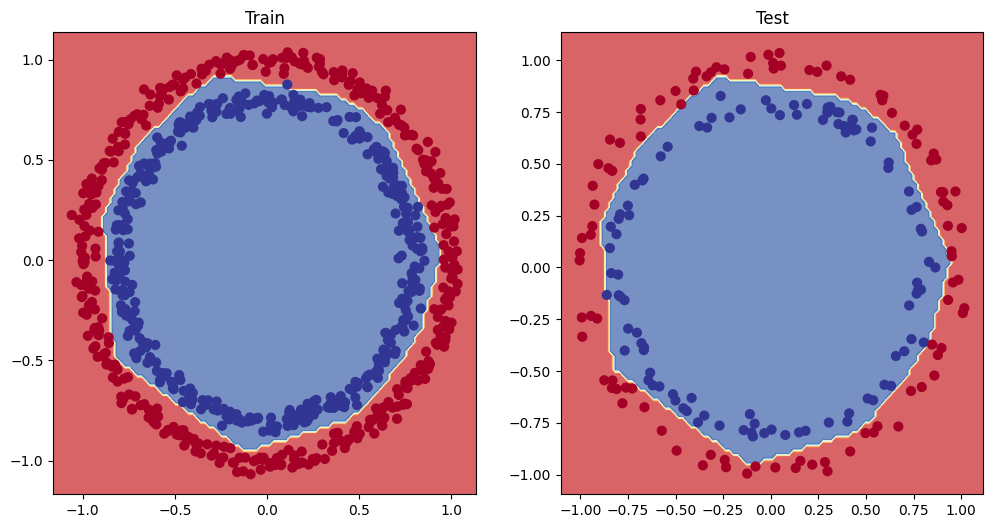

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicationg non-linear activation functions

illustration of linear activation function and non-linear activation function (ReLU and Sigmoid activation)

In [ ]:
# Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

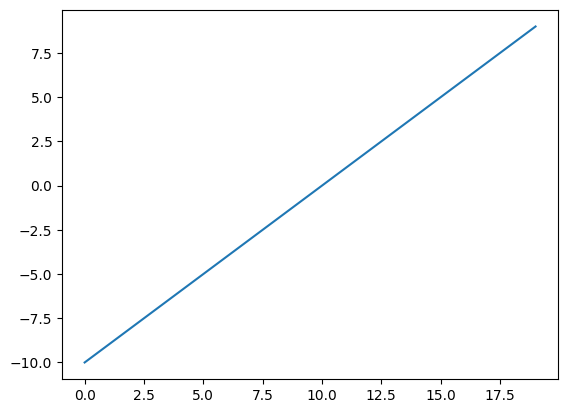

In [ ]:
plt.plot(A);

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x) # inputs must be tensor

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

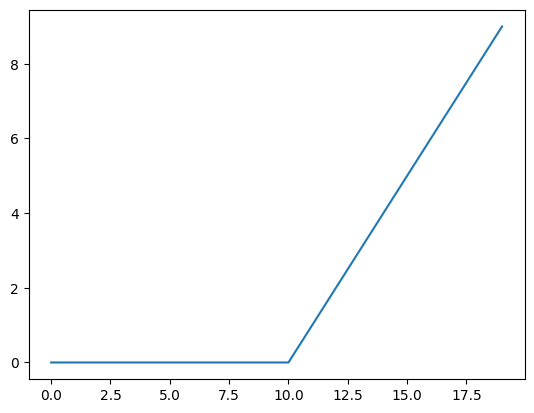

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A))

In [ ]:
## Sigmoid custom function

def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1/ (1+torch.exp(-x))


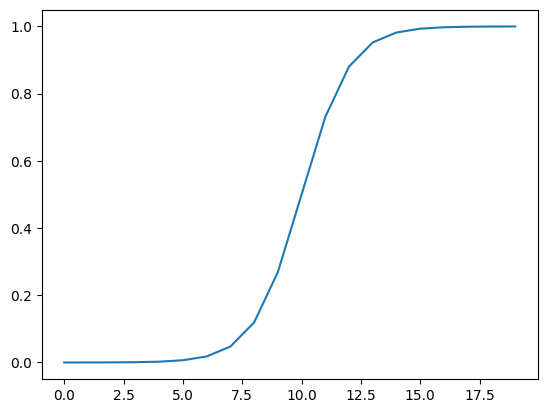

In [ ]:
plt.plot(torch.sigmoid(A));

## Creating a toy multi-class dataset

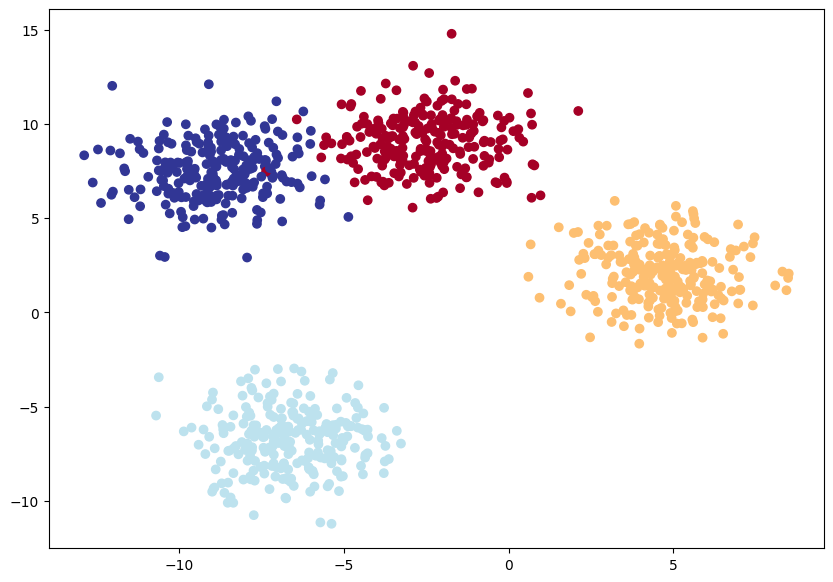

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for the data sample

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


# 1. Create multi-class data

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

X_blob_train, X_blob_test=X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test=y_blob_train.to(device), y_blob_test.to(device)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

#Building a multi class classificaiton model in Pytorch

In [ ]:
# Create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#Build a multi-class classification model

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
      """Initializes multi-class classification model.

      Args:
        input_features (int): number of input features to the model
        output_features (int): number of outputs features (number of output vlasses)
        hidden_units (int): Number of hidden units between layers, default 8

      Returns:

      Example:
      """
      super().__init__()
      self.linear_layer_stack = nn.Sequential(
          nn.Linear(in_features=input_features, out_features=hidden_units),
          #nn.ReLU(),
          nn.Linear(in_features=hidden_units, out_features=hidden_units),
          #nn.ReLU(),
          nn.Linear(in_features=hidden_units, out_features=output_features)
      )
    def forward(self, x):
      return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4.to(device )

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.], device='cuda:0'))

In [ ]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.], device='cuda:0')

In [ ]:
# Create a loss function and an optimizer for a multi-class classification model
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=.01)


#Getting prediction probabiliteis for a multi-class Pytorch model


Logits (Raw output of model)-> Pred probs (Use softmax `torch.softmax`) -> pred labels. (take the `argmax` of the prediction probabilities)

In [ ]:
# Get raw outputs of our model
print(next(model_4.parameters()).device)
model_4(X_blob_test)

cuda:0


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940],
        [ 0.4418, -1.3851,  0.3083,  1.2086],
        [-1.5169, -0.8383, -1.7723, -0.7571],
        [-0.2796, -1.6213, -0.5212,  0.8142],
        [ 0.0087, -1.6676, -0.2100,  1.0779],
        [-0.1146, -1.7781, -0.3619,  1.0633],
        [ 1.4046, -1.2270,  1.3925,  1.8533],
        [ 1.7991, -1.2295,  1.8271,  2.1682],
        [ 1.7553,  0.1992,  1.9850,  1.0572],
        [ 1.7293, -1.4932,  1.7121,  2.3114],
        [ 2.0059, -0.9975,  2.0886,  2.1575],
        [ 1.3878, -1.3971,  1.3495,  1.9682],
        [ 0.2662, -1.2199,  0.1385

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))


In [ ]:
y_blob_test[:5]

tensor([1., 3., 2., 1., 0.], device='cuda:0')

In [ ]:
#convert logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [ ]:
print(torch.sum(y_pred_probs[0]))
print(torch.max(y_pred_probs[0]))
print(torch.argmax(y_pred_probs[0]))

tensor(1., device='cuda:0')
tensor(0.3715, device='cuda:0')
tensor(3, device='cuda:0')


In [ ]:
# Convert our model's prediction probabilities into prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds


tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [ ]:
#Create a training loop for a multi-class model
torch.manual_seed(42)


X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.type(torch.LongTensor).to(device), y_blob_test.type(torch.LongTensor).to(device)
print(next(model_4.parameters()).device)

model_4 = model_4.to(device)

epochs = 1000

for epoch in range(epochs):

  model_4.train()

  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)


    test_loss = loss_fn(test_logits, y_blob_test)
    test_accuracy = accuracy_fn(test_preds, y_blob_test)

  if epoch % 100 == 0:
    print(f"loss: {loss} | test_loss: {test_loss}| test accuracy: {test_accuracy} | epoch: {epoch}|")

cuda:0
loss: 1.0432369709014893 | test_loss: 0.9633513689041138| test accuracy: 71.0 | epoch: 0|
loss: 0.15145373344421387 | test_loss: 0.14839504659175873| test accuracy: 99.0 | epoch: 100|
loss: 0.08318031579256058 | test_loss: 0.07778327912092209| test accuracy: 99.5 | epoch: 200|
loss: 0.060486163944005966 | test_loss: 0.05395049229264259| test accuracy: 99.5 | epoch: 300|
loss: 0.049649372696876526 | test_loss: 0.04247433319687843| test accuracy: 99.5 | epoch: 400|
loss: 0.043424658477306366 | test_loss: 0.03582151234149933| test accuracy: 99.5 | epoch: 500|
loss: 0.03943055495619774 | test_loss: 0.03150384500622749| test accuracy: 99.5 | epoch: 600|
loss: 0.03667262941598892 | test_loss: 0.02848188206553459| test accuracy: 99.5 | epoch: 700|
loss: 0.03466643765568733 | test_loss: 0.02624967135488987| test accuracy: 99.5 | epoch: 800|
loss: 0.033149149268865585 | test_loss: 0.024533065035939217| test accuracy: 99.5 | epoch: 900|


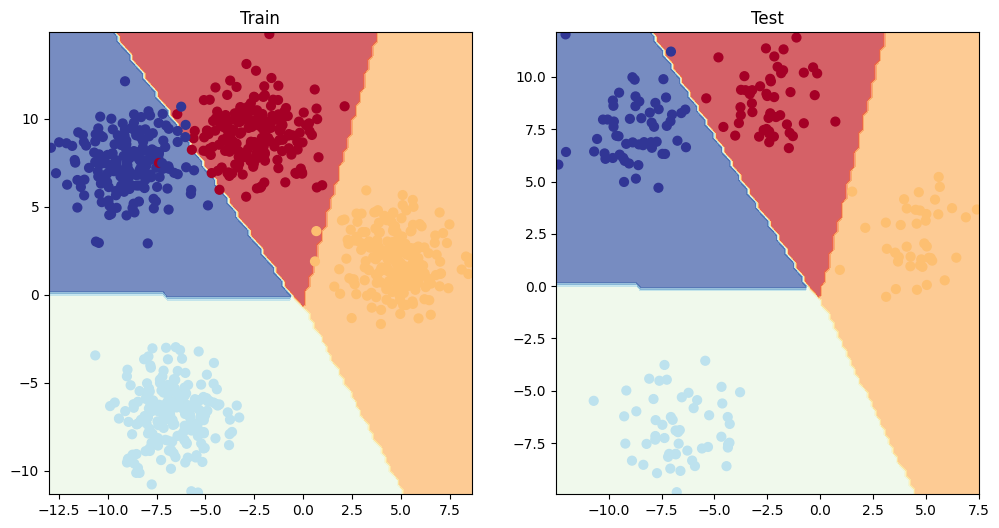

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### Making and evaluating predictions: PyTorch multi-class model

In [ ]:
# Make prediction
X_blob_test = X_blob_test.to(device)
model_4.to(device)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[  4.2922,  10.2848, -14.8686,  -9.7605],
        [  4.9978, -11.9978,   3.3676,  10.6332],
        [ -5.5231, -13.2642,  20.9664,  12.7714],
        [  1.8175,   7.5129,  -8.5815,  -6.9860],
        [  8.0098,   3.2442, -14.5871,  -3.6407],
        [  5.5682, -14.9003,   4.9926,  13.2453],
        [ -5.9103, -10.1250,  18.8488,   9.9250],
        [  7.0263,  -0.7833,  -9.5487,   0.1484],
        [ -5.5183, -18.4925,  25.4975,  17.5713],
        [  7.2611,   0.6885, -11.1943,  -1.2247]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

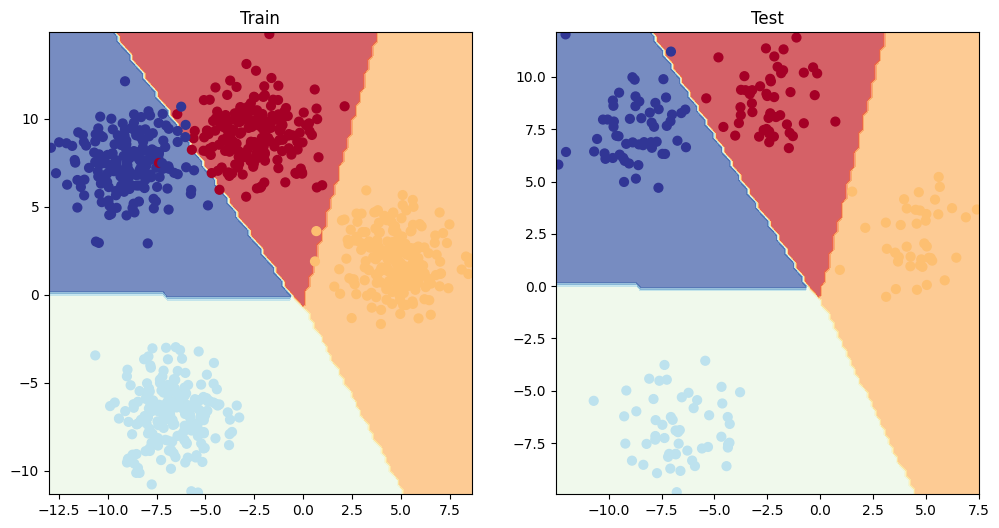

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## A few more classificaiton metrics (can be used to evaluate classification model)
* Accuracy - Out of 100 samples, how many does our model get right
* Precision
* Recall
* F1-score
* Classification report


Go to TorchMetrics for more torch metrix

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 10.0 MB/s eta 0:00:00


In [ ]:
# Example
from torchmetrics import Accuracy

#Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

#Calculate accuracy
torchmetric_accuracy(y_preds.to(device), y_blob_test.to(device)).to(device)

tensor(0.9950, device='cuda:0')